In [1]:
import rpyc

import numpy as np

conn=rpyc.connect('localhost',18861,config={'allow_pickle': True})

Z=conn.root.checkChip()
mdatastr = 'ch \t R \t C \n' 
for i in range(8):
    R=Z[i][0].real
    w=2*np.pi*4e3
    C=1/(w*Z[i][0].imag)*1e9
    Rs = '%.1f'%R
    Cs = '%.1f'%-C
    mdatastr += str(i+1) +':\t'+Rs+'\t'+Cs+ '\n' 
print mdatastr

print conn.root.getRecordingInfo()

ch 	 R 	 C 
1:	1021.3	9.7
2:	2024.8	9.8
3:	3015.7	10.9
4:	3890.3	10.0
5:	5081.3	9.4
6:	6136.5	11.0
7:	6821.4	9.7
8:	8138.2	9.4

{'freqs': [4000], 'period': 1, 'channels': [0, 1, 2, 3, 4, 5, 6, 7], 'deadline': 60, 'begintime': '2017-11-30 17:56:43', 'isPaused': False}


In [2]:
Z=conn.root.measureImpedance(1,8000)
print Z

[[(2011.060874106912-2044.9994288578823j)]]


In [3]:
RecordingInfo = {
    'isPaused': False,
    'channels': range(8),
    'freqs': [4000, 8000],
    'period': 1,
    'deadline': 10
}

conn.root.setup(RecordingInfo)
conn.root.getStatus()
conn.root.getRecordingInfo()

{'channels': [0, 1, 2, 3, 4, 5, 6, 7], 'freqs': [4000, 8000], 'deadline': 10, 'period': 1, 'isPaused': False}

In [4]:
conn.root.recording()

In [31]:
conn.root.finish()

data copying
fitting sine
fitting curve generation
now plotting


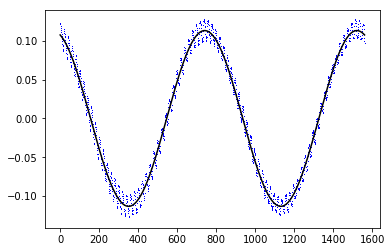

In [50]:
run fitExample.py

In [4]:
from firebase import firebase

firebase = firebase.FirebaseApplication("https://culturesystem-5f82b.firebaseio.com/")

In [5]:
device_num = '/Device_0/'

RecordingInfo = {
	'isPaused': False,
	'channels': str(range(8)),
	'freqs': '[4000]',
	'period': 1,
	'deadline': 10
}

firebase.put('/', 'SETUP', RecordingInfo)
firebase.put('/', 'COMMAND', 'start')


u'setup_ok'

In [6]:
firebase.put(device_num, 'COMMAND', 'setup')

u'setup'

In [7]:
firebase.put(device_num, 'COMMAND', 'start')

u'start'

In [8]:
firebase.put(device_num, 'COMMAND', 'stop')

u'stop'